<a href="https://colab.research.google.com/github/freida20git/bird-detection-tracking/blob/main/birds_training_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Training and testing Object detection Yolov11n(nano) model on birds dataset total 9891 images**


**Train:** 6664 Images 67%

**Validation:**2045 Images 21%

**Test:** 1182 Images 12%




dataset is available at Roboflow: https://universe.roboflow.com/sky-sd2zq/bird_only-pt0bm/dataset/1

In [ ]:
!pip install ultralytics

In [ ]:
import random
from ultralytics import YOLO
import cv2
import torch #Import torch here, after other installations and imports

# train dataset:

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RUUyvlsbnfgBm7cMeYmz")
project = rf.workspace("sky-sd2zq").project("bird_only-pt0bm")
version = project.version(1)
dataset = version.download("yolov11")

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=75 imgsz=640

In [ ]:
model=YOLO('/content/runs/detect/train/weights/best.pt')

import model from drive:

In [ ]:
# uploaded best.pt to drive manually
!gdown 'https://drive.google.com/uc?id=1x-A9WOyZtZrOqlgM-EXg5g4ek6YgmCYO'

Downloading...
From: https://drive.google.com/uc?id=1x-A9WOyZtZrOqlgM-EXg5g4ek6YgmCYO
To: /content/bestbirdsonly.pt
100% 5.47M/5.47M [00:00<00:00, 40.3MB/s]


In [ ]:
model=YOLO(' /content/bestbirdsonly.pt')

# validate result:

In [ ]:
!yolo task=detect mode=val data={dataset.location}/data.yaml model="/content/bestbirdsonly.pt" imgsz=640

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 561.4±273.2 MB/s, size: 58.3 KB)
val: Scanning /content/Bird_Only-1/valid/labels.cache... 2045 images, 1 backgrounds, 0 corrupt: 100% 2045/2045 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 288, len(boxes) = 14349. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 128/128 [10:23<00:00,  4.87s/it]
                   all       2045      14349       0.78      0.752      0.793      0.444
Speed: 4.6ms preprocess, 291.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at h

Metrics are pretty good in comparison to other similar github projects (any
 mAP50-95 score above 0.4 is considered ok)

# test the trained model on data:


image 1/1 /content/Bird_Only-1/test/images/000707_png.rf.b76703c594c2483fe05214b3c0f1076d.jpg: 640x640 1 Bird, 251.4ms
Speed: 5.2ms preprocess, 251.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Image 1:
  Predictions (class IDs): [          0]
  Confidences: [    0.58842]


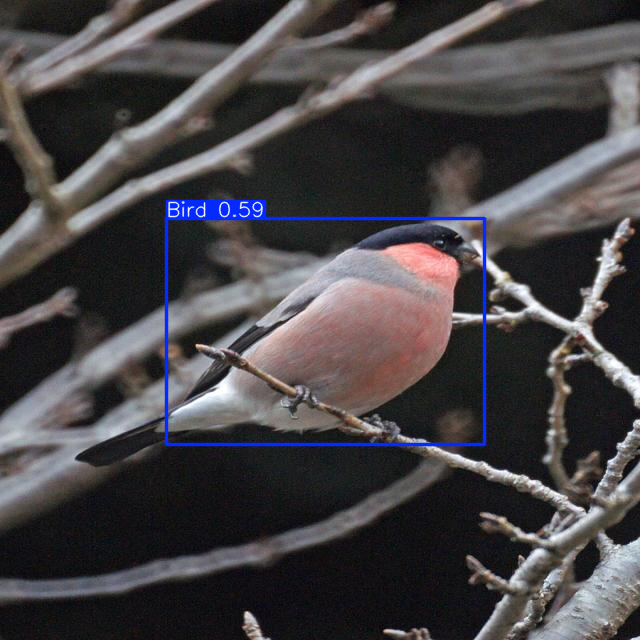


image 1/1 /content/Bird_Only-1/test/images/000575_png.rf.26dca68380634f594235a5b4059a9acc.jpg: 640x640 4 Birds, 286.5ms
Speed: 4.2ms preprocess, 286.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Image 2:
  Predictions (class IDs): [          0           0           0           0]
  Confidences: [    0.81659     0.62379      0.5685     0.50358]


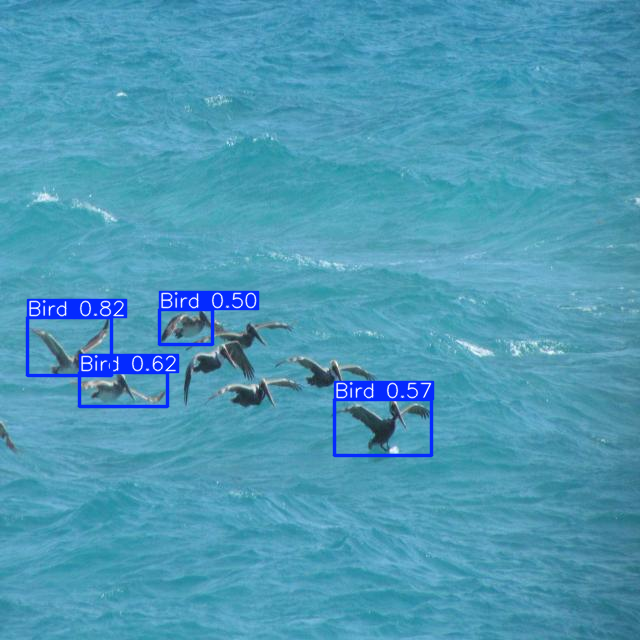


image 1/1 /content/Bird_Only-1/test/images/000652_png.rf.4dc50e1e20cddf90ddb3b9e00f1fe353.jpg: 640x640 1 Bird, 250.7ms
Speed: 3.3ms preprocess, 250.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Image 3:
  Predictions (class IDs): [          0]
  Confidences: [    0.87948]


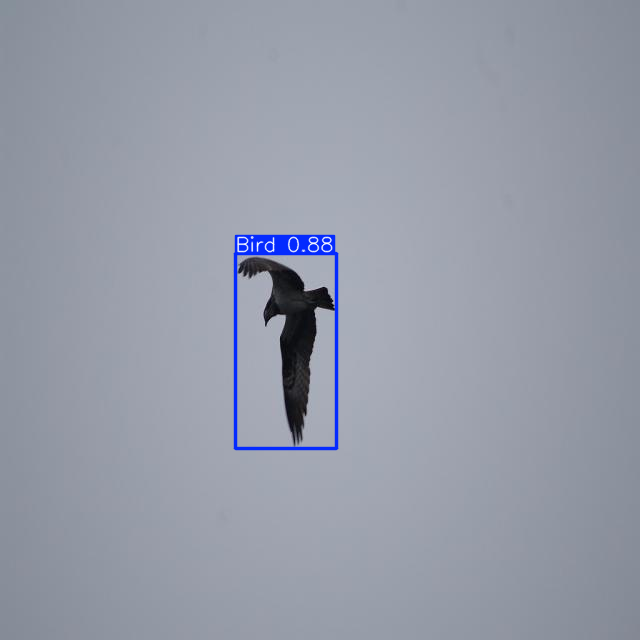


image 1/1 /content/Bird_Only-1/test/images/copy_46609276-4123-4C73-B25E-083E7B94C53E_mov-157_jpg.rf.0cec4aa5e11269561393c1f6546e0961.jpg: 640x640 5 Birds, 227.6ms
Speed: 3.7ms preprocess, 227.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Image 4:
  Predictions (class IDs): [          0           0           0           0           0]
  Confidences: [    0.67193     0.63196     0.56507     0.52931      0.5047]


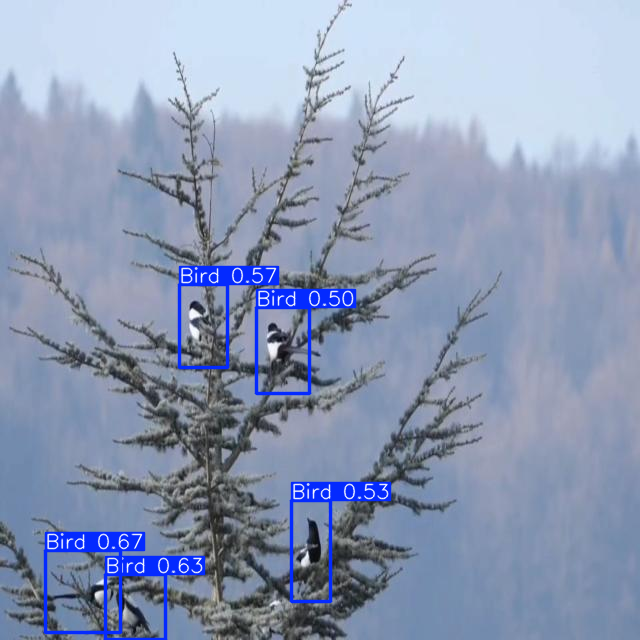


image 1/1 /content/Bird_Only-1/test/images/V_BIRD_022_mp4-20_jpg.rf.5821c914bb19ed37c2959ff7730a2701.jpg: 640x640 1 Bird, 245.9ms
Speed: 4.5ms preprocess, 245.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Image 5:
  Predictions (class IDs): [          0]
  Confidences: [    0.54238]


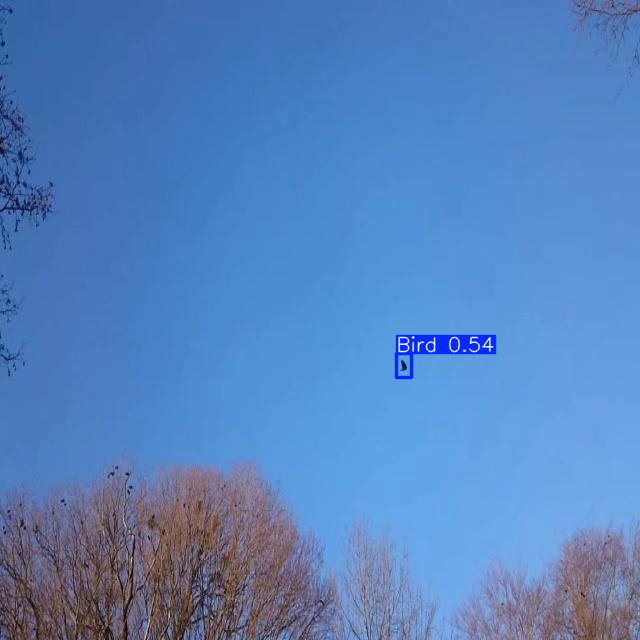

In [ ]:
# print predictions for 2 images
import os
test_folder = f"{dataset.location}/test/images"
image_files = [os.path.join(test_folder, f) for f in os.listdir(test_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

for i, image_path in enumerate(image_files[:5]):
    results = model(image_path, conf=0.5)

    predictions = results[0].boxes.cls.cpu().numpy()  # Class IDs
    confidences = results[0].boxes.conf.cpu().numpy()  # Confidence scores

    print(f"Image {i + 1}:")
    print(f"  Predictions (class IDs): {predictions}")
    print(f"  Confidences: {confidences}")

    results[0].show()


In [ ]:
#functions to run model afterwards
def predict(chosen_model, img, classes=[], conf=0.5):
    if classes:
        results = chosen_model.predict(img, classes=classes, conf=conf)
    else:
        results = chosen_model.predict(img, conf=conf)

    return results

def predict_and_detect(chosen_model, img, classes=[], conf=0.5, rectangle_thickness=2, text_thickness=1):
    results = predict(chosen_model, img, classes, conf=conf)
    for result in results:
        for box in result.boxes:
            cv2.rectangle(img, (int(box.xyxy[0][0]), int(box.xyxy[0][1])),
                          (int(box.xyxy[0][2]), int(box.xyxy[0][3])), (255, 0, 0), rectangle_thickness)
            cv2.putText(img, f"{result.names[int(box.cls[0])]}",
                        (int(box.xyxy[0][0]), int(box.xyxy[0][1]) - 10),
                        cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), text_thickness)
    return img, results


0: 640x640 1 Bird, 201.9ms
Speed: 5.2ms preprocess, 201.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


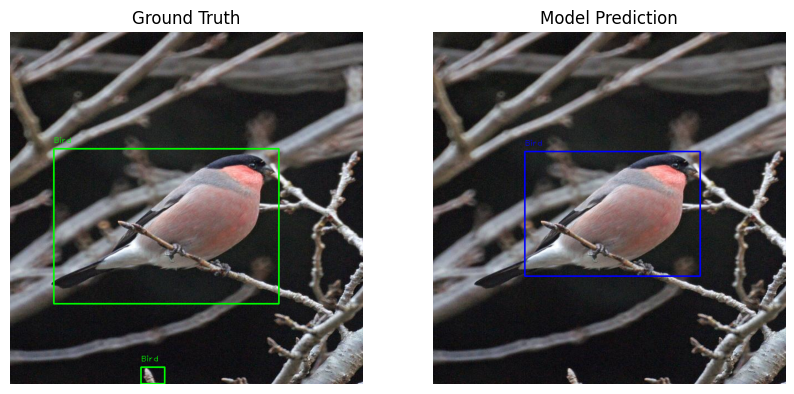


0: 640x640 4 Birds, 205.0ms
Speed: 3.7ms preprocess, 205.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


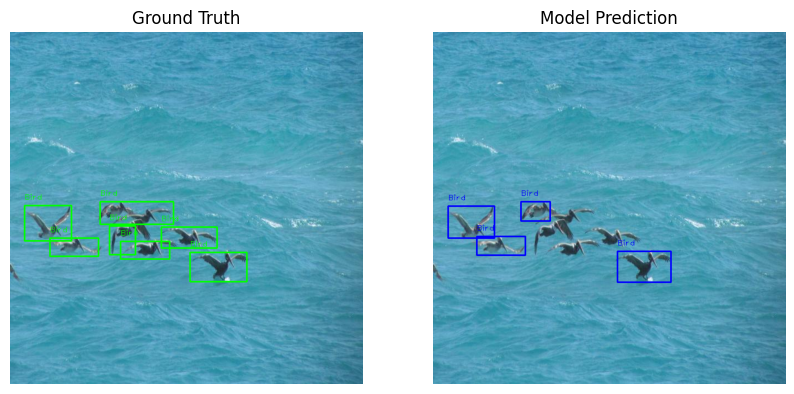


0: 640x640 1 Bird, 215.7ms
Speed: 3.6ms preprocess, 215.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


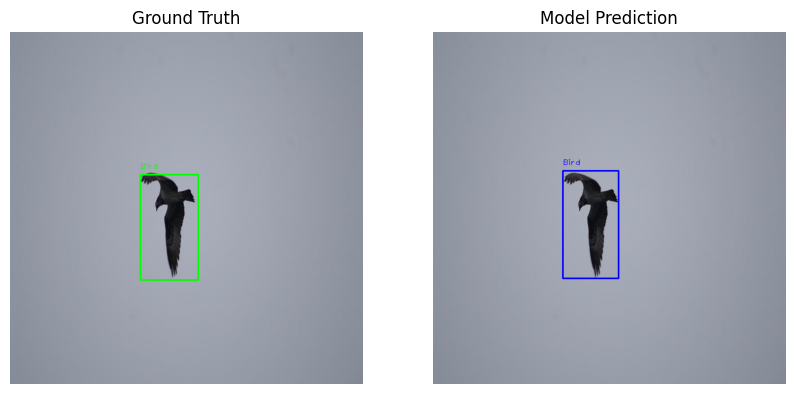


0: 640x640 5 Birds, 200.9ms
Speed: 4.3ms preprocess, 200.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


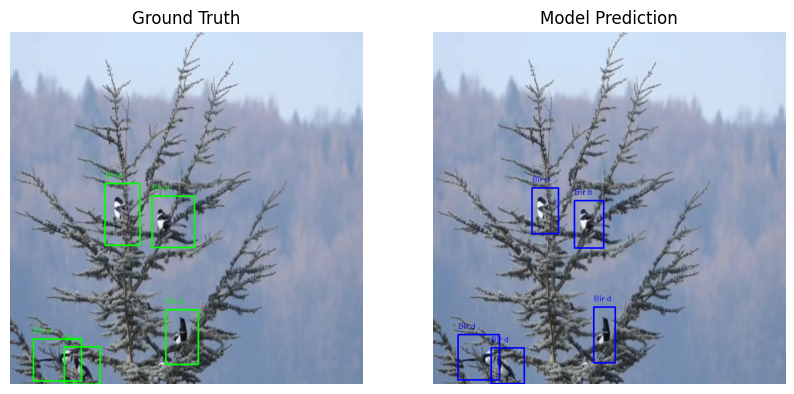


0: 640x640 1 Bird, 212.0ms
Speed: 3.5ms preprocess, 212.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


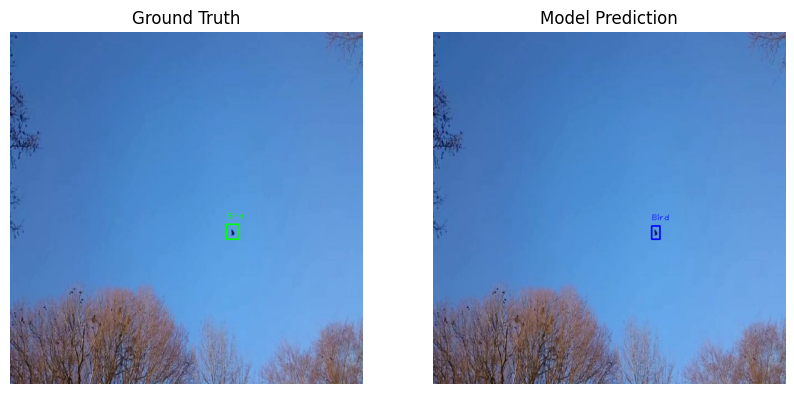


0: 640x640 1 Bird, 201.4ms
Speed: 3.6ms preprocess, 201.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


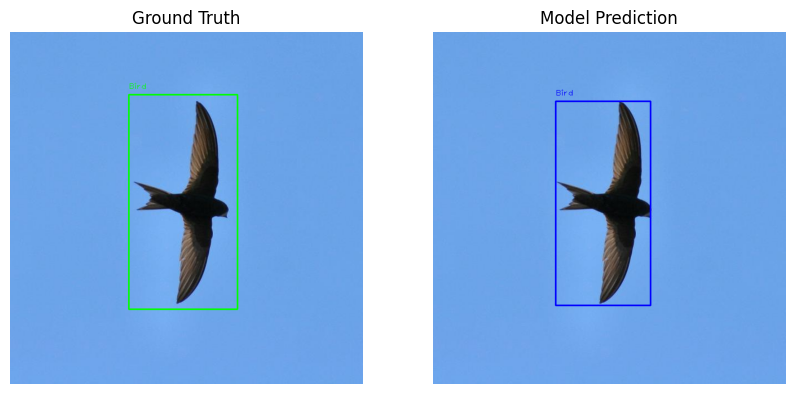


0: 640x640 1 Bird, 217.8ms
Speed: 3.9ms preprocess, 217.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


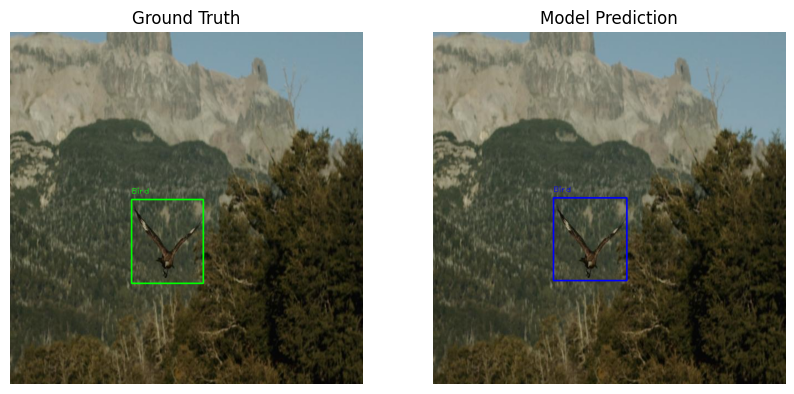


0: 640x640 1 Bird, 249.7ms
Speed: 3.9ms preprocess, 249.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


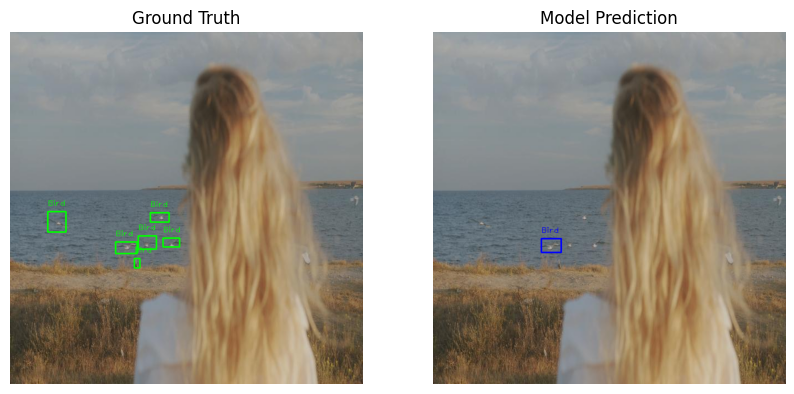

In [ ]:
# Vizualize -COMPARE PREDICTIONS TO GROUND TRUTH LABELS
import os
import cv2
import matplotlib.pyplot as plt
test_folder = f"{dataset.location}/test/images"
label_folder = f"{dataset.location}/test/labels"  # Folder containing labels in YOLO format
image_files = [os.path.join(test_folder, f) for f in os.listdir(test_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
# Update label_map to include all classes in your dataset
label_map = model.names
# Function to draw ground truth labels on an image
def draw_labels(image_path, label_path, label_map, rectangle_thickness=2, text_thickness=1):
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    with open(label_path, "r") as file:
        for line in file:
            class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.strip().split())
            class_id = int(class_id)

            # Check if class_id is in label_map before accessing it
            if class_id in label_map:
                # Convert normalized YOLO format to pixel coordinates
                x1 = int((x_center - bbox_width / 2) * width)
                y1 = int((y_center - bbox_height / 2) * height)
                x2 = int((x_center + bbox_width / 2) * width)
                y2 = int((y_center + bbox_height / 2) * height)

                # Draw bounding box and label
                cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), rectangle_thickness)
                cv2.putText(image, label_map[class_id], (x1, y1 - 10), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0), text_thickness)
            else:
                print(f"Warning: Class ID {class_id} not found in label_map. Skipping this box.")

    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Loop through images and process them
for i, image_path in enumerate(image_files[:8]):
    label_path = os.path.join(label_folder, os.path.basename(image_path).replace(".jpg", ".txt"))
    gt_image = draw_labels(image_path, label_path, label_map)
    pred_image, _ = predict_and_detect(model, cv2.imread(image_path))

    # Plot the images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gt_image)
    plt.title("Ground Truth")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(pred_image, cv2.COLOR_BGR2RGB))
    plt.title("Model Prediction")
    plt.axis("off")

    plt.show()